In [1]:
# %%
# load data
import pandas as pd # type: ignore

data = pd.read_csv('data//train.csv')
df = data.copy()
# 任选 10 行查看
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
37,38,0,3,"Cann, Mr. Ernest Charles",male,21.0,0,0,A./5. 2152,8.0500,NaN,S
488,489,0,3,"Somerton, Mr. Francis William",male,30.0,0,0,A.5. 18509,8.0500,NaN,S
272,273,1,2,"Mellinger, Mrs. (Elizabeth Anne Maidment)",female,41.0,0,1,250644,19.5000,NaN,S
628,629,0,3,"Bostandyeff, Mr. Guentcho",male,26.0,0,0,349224,7.8958,NaN,S
675,676,0,3,"Edvardsson, Mr. Gustaf Hjalmar",male,18.0,0,0,349912,7.7750,NaN,S
791,792,0,2,"Gaskell, Mr. Alfred",male,16.0,0,0,239865,26.0000,NaN,S
506,507,1,2,"Quick, Mrs. Frederick Charles (Jane Richards)",female,33.0,0,2,26360,26.0000,NaN,S
372,373,0,3,"Beavan, Mr. William Thomas",male,19.0,0,0,323951,8.0500,NaN,S
282,283,0,3,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,345778,9.5000,NaN,S


In [2]:
# %%
# delete some features that are not useful for prediction
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [3]:
# %%
# check if there is any NaN in the dataset
print('Is there any NaN in the dataset: {}'.format(df.isnull().values.any()))
df.dropna(inplace=True)
print('Is there any NaN in the dataset: {}'.format(df.isnull().values.any()))

Is there any NaN in the dataset: True
Is there any NaN in the dataset: False


In [4]:
# %%
# convert categorical data into numerical data using one-hot encoding
# 例如 Sex 会被拆成 Sex_female / Sex_male 两列
df = pd.get_dummies(df, drop_first=True)   # drop_first=True 可避免虚拟变量陷阱
df.sample(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
844,0,3,17.0,0,0,8.6625,True,False,True
582,0,2,54.0,0,0,26.0000,True,False,True
153,0,3,40.5,0,2,14.5000,True,False,True
160,0,3,44.0,0,1,16.1000,True,False,True
30,0,1,40.0,0,0,27.7208,True,False,False
390,1,1,36.0,1,2,120.0000,True,False,True
694,0,1,60.0,0,0,26.5500,True,False,True
608,1,2,22.0,1,2,41.5792,False,False,False
742,1,1,21.0,2,2,262.3750,False,False,False
887,1,1,19.0,0,0,30.0000,False,False,True


In [5]:
# %% -----------------------------------------------------------
# separate the features and labels
X = df.drop('Survived', axis=1)   # 特征
y = df['Survived']                # 标签

In [6]:
# %% -----------------------------------------------------------
# train-test split
from sklearn.model_selection import train_test_split # type: ignore

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       # 20% 用作测试集
    random_state=42,
    stratify=y           # 保证类别分布一致
)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (569, 8), Test shape: (143, 8)


In [7]:
# %% -----------------------------------------------------------
# build models
from sklearn.pipeline import Pipeline # type: ignore
from sklearn.preprocessing import StandardScaler # type: ignore
from sklearn.svm import SVC # type: ignore
from sklearn.neighbors import KNeighborsClassifier # type: ignore
from sklearn.ensemble import RandomForestClassifier # type: ignore

models = {
    "SVM (RBF)": Pipeline([
        ('scaler', StandardScaler()),
        ('clf', SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42))
    ]),
    "KNN (k=7)": Pipeline([
        ('scaler', StandardScaler()),
        ('clf', KNeighborsClassifier(n_neighbors=7))
    ]),
    "Random Forest": RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    )
}

Training: SVM (RBF)
Accuracy: 0.8322
Classification report:
              precision    recall  f1-score   support

           0     0.8280    0.9059    0.8652        85
           1     0.8400    0.7241    0.7778        58

    accuracy                         0.8322       143
   macro avg     0.8340    0.8150    0.8215       143
weighted avg     0.8328    0.8322    0.8297       143

Confusion matrix:
[[77  8]
 [16 42]]
ROC-AUC: 0.8599


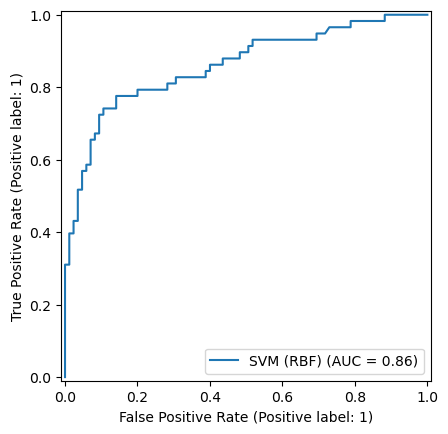

Training: KNN (k=7)
Accuracy: 0.8042
Classification report:
              precision    recall  f1-score   support

           0     0.8353    0.8353    0.8353        85
           1     0.7586    0.7586    0.7586        58

    accuracy                         0.8042       143
   macro avg     0.7970    0.7970    0.7970       143
weighted avg     0.8042    0.8042    0.8042       143

Confusion matrix:
[[71 14]
 [14 44]]
ROC-AUC: 0.8671


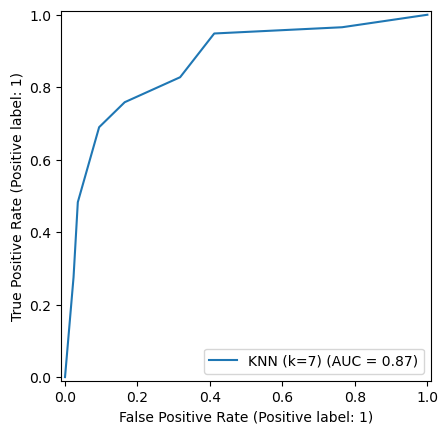

Training: Random Forest
Accuracy: 0.7832
Classification report:
              precision    recall  f1-score   support

           0     0.8293    0.8000    0.8144        85
           1     0.7213    0.7586    0.7395        58

    accuracy                         0.7832       143
   macro avg     0.7753    0.7793    0.7769       143
weighted avg     0.7855    0.7832    0.7840       143

Confusion matrix:
[[68 17]
 [14 44]]
ROC-AUC: 0.8529


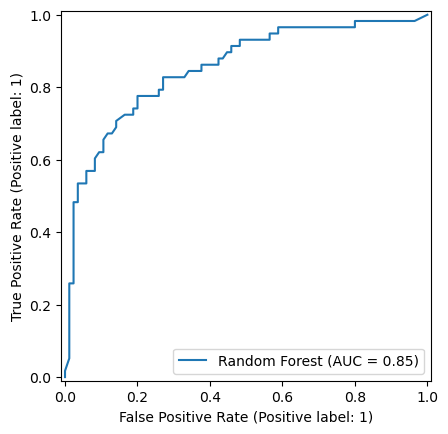

In [8]:
# %% -----------------------------------------------------------
# predict and evaluate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay # type: ignore
import matplotlib.pyplot as plt # type: ignore

for name, model in models.items():
    print("=" * 60)
    print(f"Training: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print("Classification report:")
    print(classification_report(y_test, y_pred, digits=4))

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion matrix:")
    print(cm)

    # 可选：绘制 ROC 曲线（仅当模型支持 predict_proba）
    if y_prob is not None:
        auc = roc_auc_score(y_test, y_prob)
        print(f"ROC-AUC: {auc:.4f}")
        RocCurveDisplay.from_predictions(y_test, y_prob, name=name)
        plt.show()
